# Led e Fotodiodi

**Informazioni generali.** Misure e caratterizzazioni di una serie di led e costruzione di uno spettro

Dettagli del setup:
* Circuito giratore come rimpiazzo di induttore in HPF RLC
* Realizzazione di oscillatore risonante e miglioramento del fattore di qualità Q
* Realizzazione di filtro notch con OpAmp agente da compontente passivo

## 

$ R = 469.98\Omega $

data001 - rosso


0


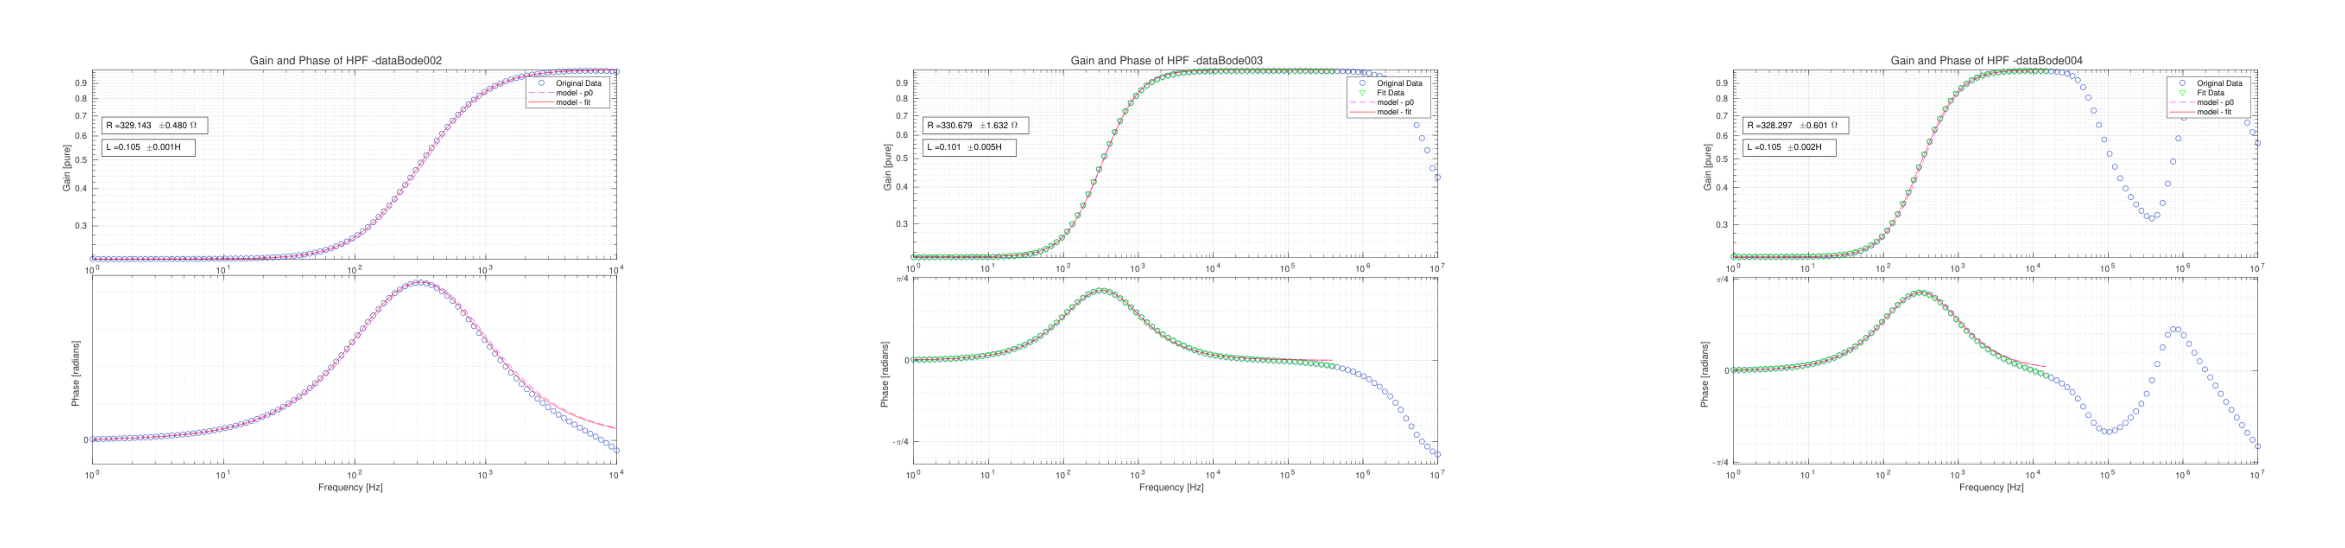

In [1]:
import fitz  # PyMuPDF
from PIL import Image
import matplotlib.pyplot as plt

# Function to convert a PDF page to an image
def pdf_page_to_image(pdf_path, page_num=0):
    pdf_document = fitz.open(pdf_path)
    page = pdf_document.load_page(page_num)  # Load the specified page
    pix = page.get_pixmap()  # Convert page to image
    img = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img

# Function to display two PDF pages side by side
def display_pdfs_side_by_side(rows, cols, pdfList):
    # Convert all PDF pages to images
    imgList = []
    for pdf in pdfList:
        imgList.append(pdf_page_to_image(pdf))

    # Create a new figure for nxm subplots (n row, m columns)
    if cols == 1 and rows == 1:
        #img = pdf_page_to_image(pdf_path)
        plt.imshow(imgList[0])
        plt.axis('off')
        plt.show()
        return
    
    fig, axes = plt.subplots(rows, cols, figsize=(30, 15), squeeze=False)
    
    # Display the various images

    for i in range(rows):
        print(i)
        if cols == 1:
            axes[i].imshow(imgList[i])
            axes[i].axis('off')
        else:
            for j in range(cols):
                axes[i][j].imshow(imgList[i*cols+j])
                axes[i][j].axis('off')
    plt.show()


# Provide the paths to your two PDFs
pdfList = ['Media/HPF/bodePlotAndFitOP77NoR2-dataBode002.pdf', 'Media/HPF/bodePlotAndFitAD8031NoR2-dataBode003.pdf', 'Media/HPF/bodePlotAndFitLM741NoR2-dataBode004.pdf']
rows = 1
cols = 3
display_pdfs_side_by_side(rows, cols, pdfList)


E' stata effettuata anche analisi del segnale nel dominio del tempo, trattandolo come una misura impulsata del della funzione di trasferimento e cercando quindi di osservare la funzione di trasferimento nella trasformata di Fourier del segnale, e si è ottenuto quanto riportato di seguito.



0


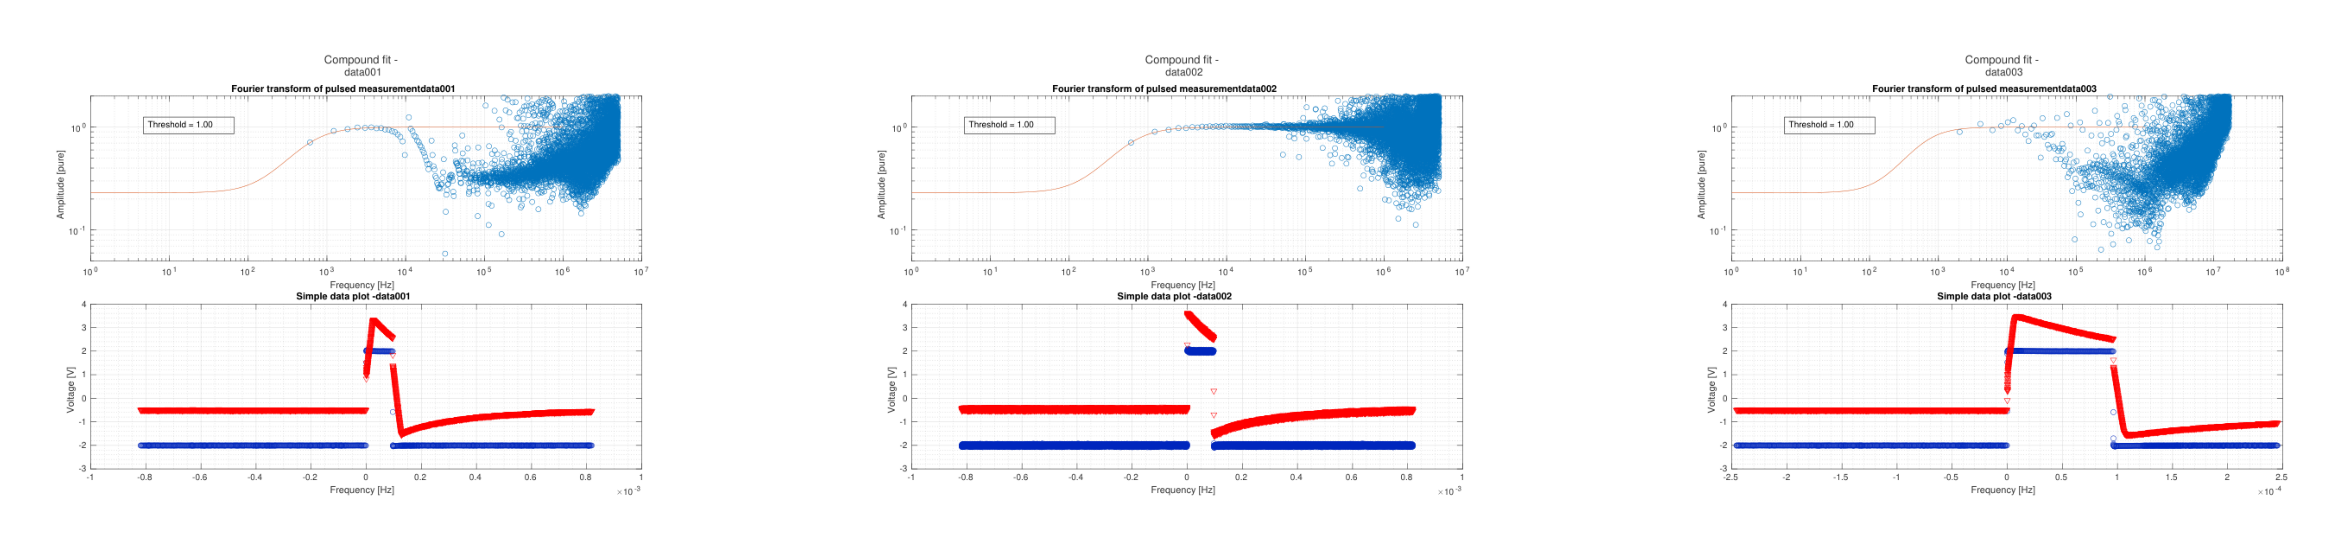

In [14]:
pdfList = ['Media/HPF/PulsedOP77-data001.pdf', 'Media/HPF/PulsedAD8031-data002.pdf', 'Media/HPF/PulsedLM741-data003.pdf']
rows = 1
cols = 3
display_pdfs_side_by_side(rows, cols, pdfList)

Come si può facilmente vedere la risposta ricorda, almeno per le componenti a frequenze medie, la funzione di trasferimento vista e fittata in precedenza. Si crede che la manca dell'andamento aspettato ad alte frequenze sia dovuto a una grande importanza di fluttuazioni statistiche e rumore.


## RLC Oscillator
Sostituendo al resistore un condensatore si ottiene quello che è equivalente a un circuito oscillatore smorzato RLC, come si può  osservare dai diagrammi posti di seguito

0


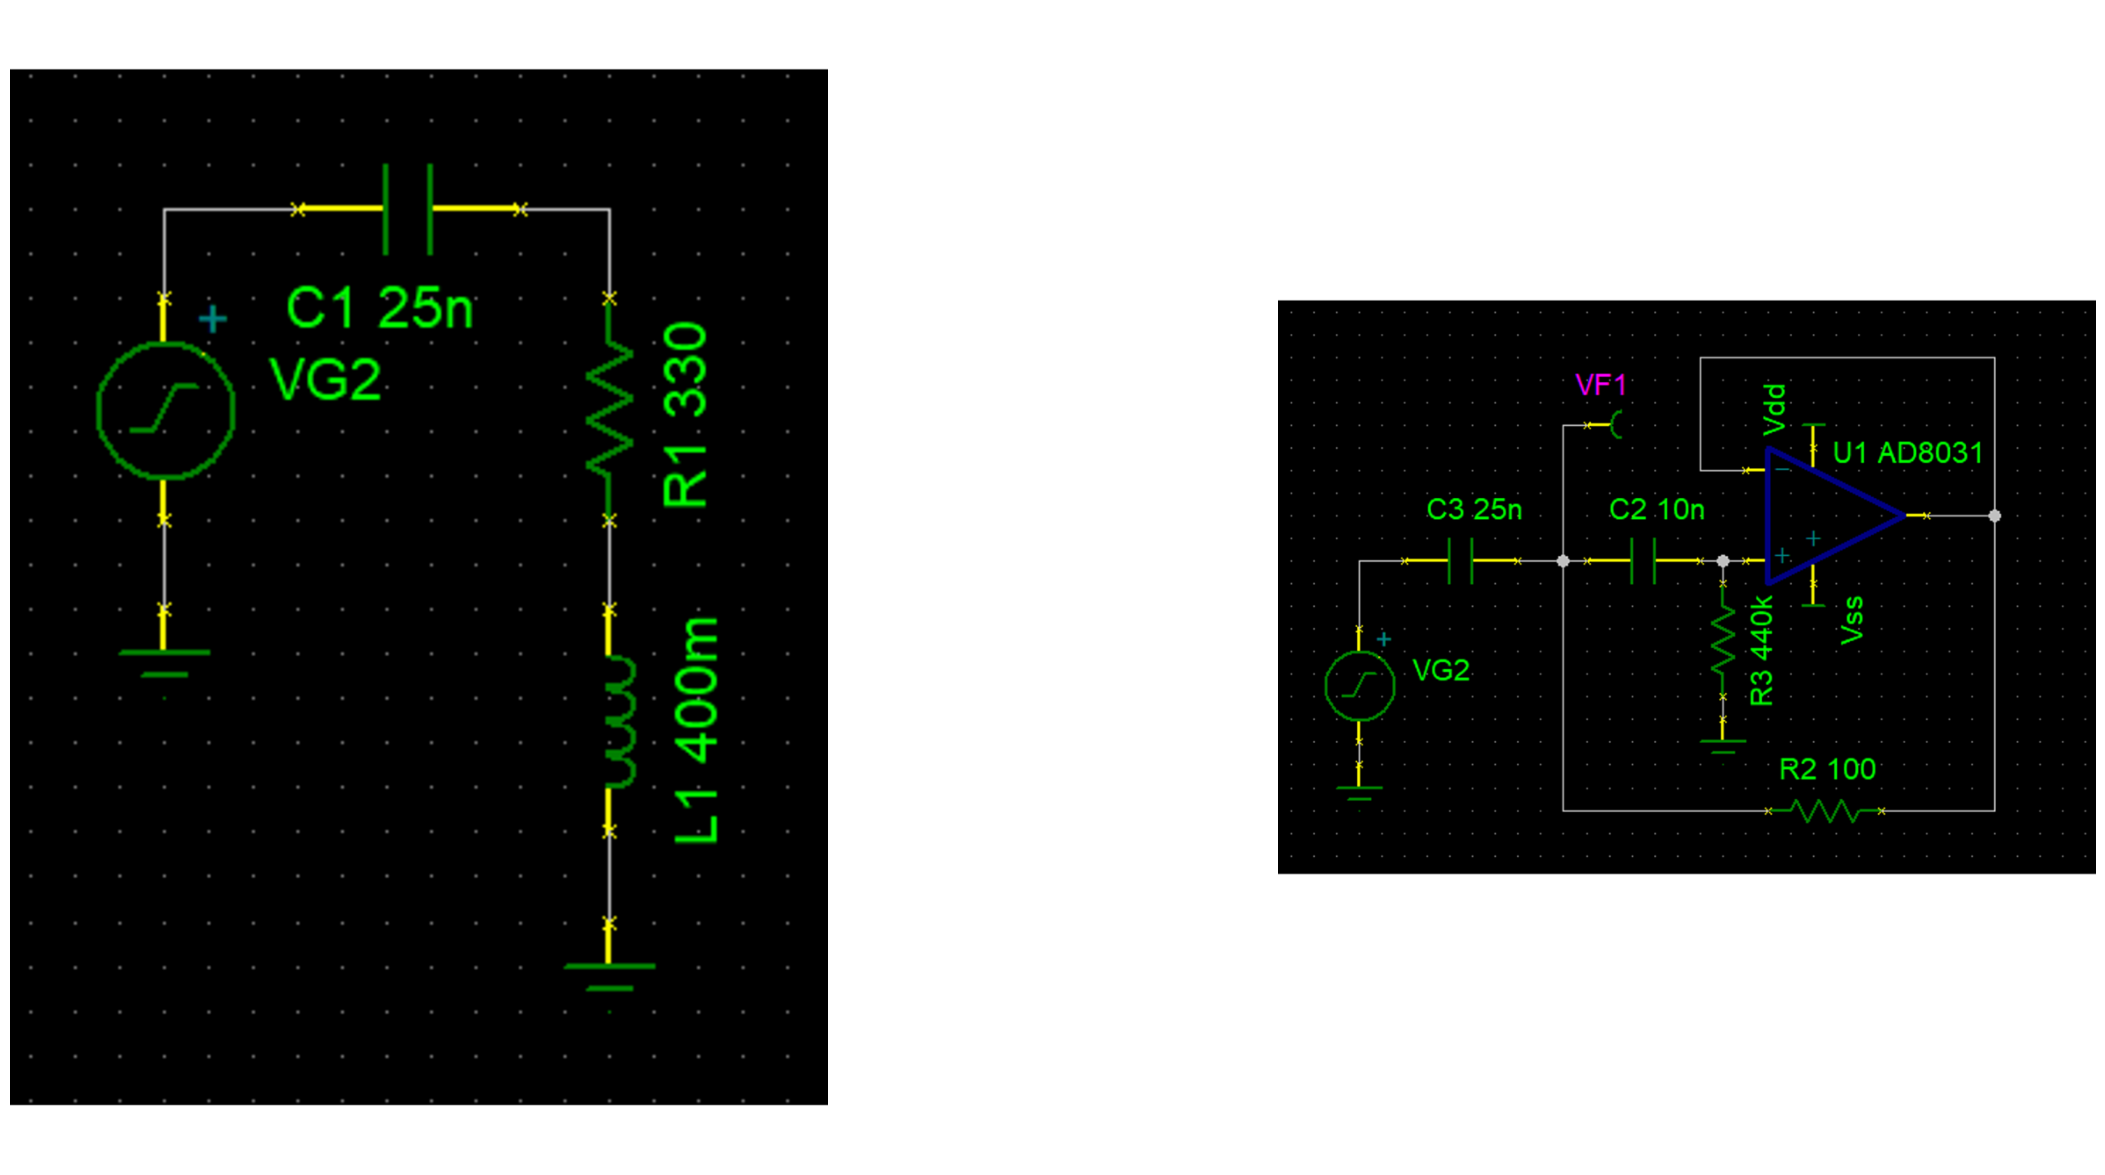

In [17]:
pdfList = ['Media/RLC/simulationRLCEquivalent.pdf', 'Media/RLC/simulationRLC.pdf']
cols  = 2
rows = 1
display_pdfs_side_by_side(rows, cols, pdfList)

Questo circuito quindi è stato poi analizzato  in dominio del tempo e delle frequenze, ottenendo per le frequenze una risonanza dovuta all'interazione tra induttore e condensatore mentre, nel dominio del tempo, si troveranno delle oscillazioni smorzate

0


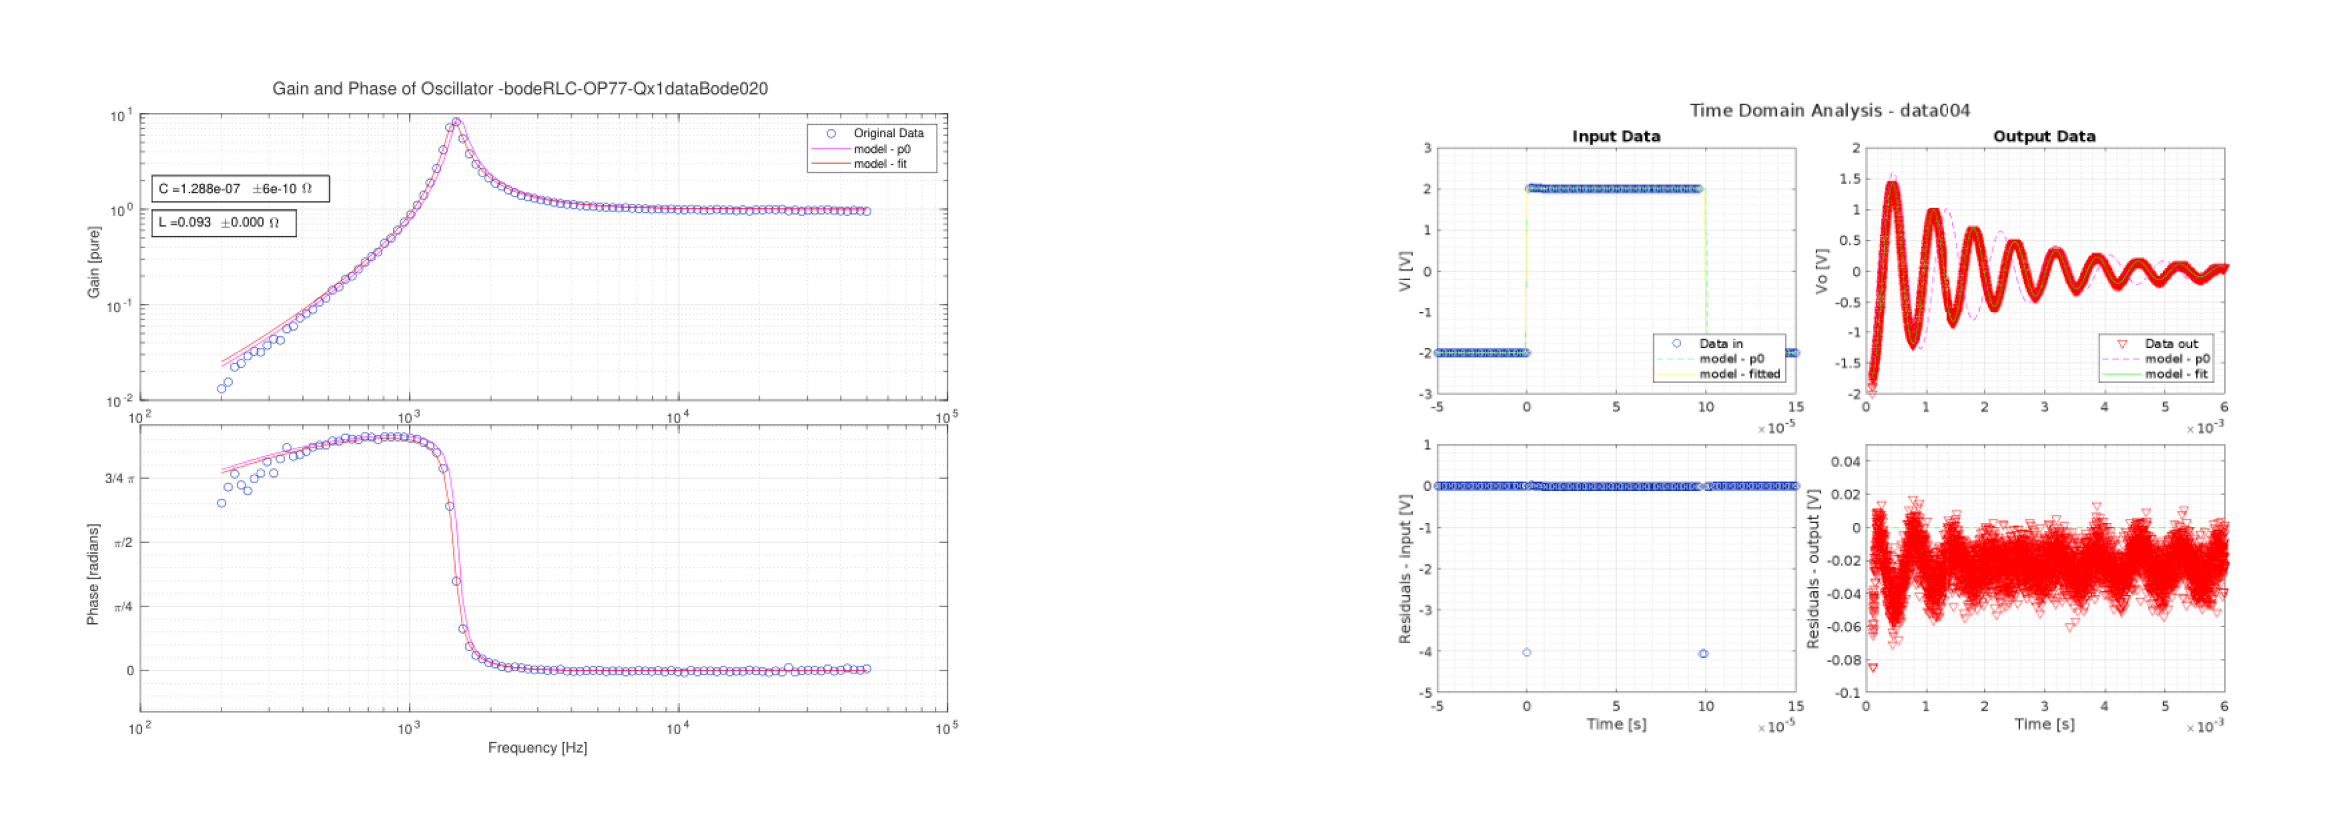

In [18]:
pdfList = ['Media/RLC/bodeRLC-OP77-Qx1dataBode020.pdf', 'Media/RLC/tda-data004.pdf']
rows = 1
cols = 2
display_pdfs_side_by_side(rows, cols, pdfList)

Si osservano facilmente sia il comportamento con presenza di risonanza quanto le oscillazioni smorzate in uscita all'oscillatore analizzato in dominio del tempo.

## Fattore di qualità
Ogni oscillatore è definito, tra i vari parametri, dal Fattore di Qualità, definito come il rapporto tra $\alpha$ e $\omega_0$ dell'equazione differenziale, che rappresenta le perdite dell'oscillatore.
Questo parametro può essere migliorato senza variare la frequenza di risonanza modificando capacità e induttanza, specificamente per raddoppiare il fattore di qualità è necessario contemporaneamente dimezzare la capacità e raddoppiare l'induttanza, si è effettuata questa modifica due volte di fila ottenendo circuiti con fattori di qualità doppi e quadrupli rispetto al valore originale, le analisi in frequenza di tali circuiti vengono quivi riportate.

0


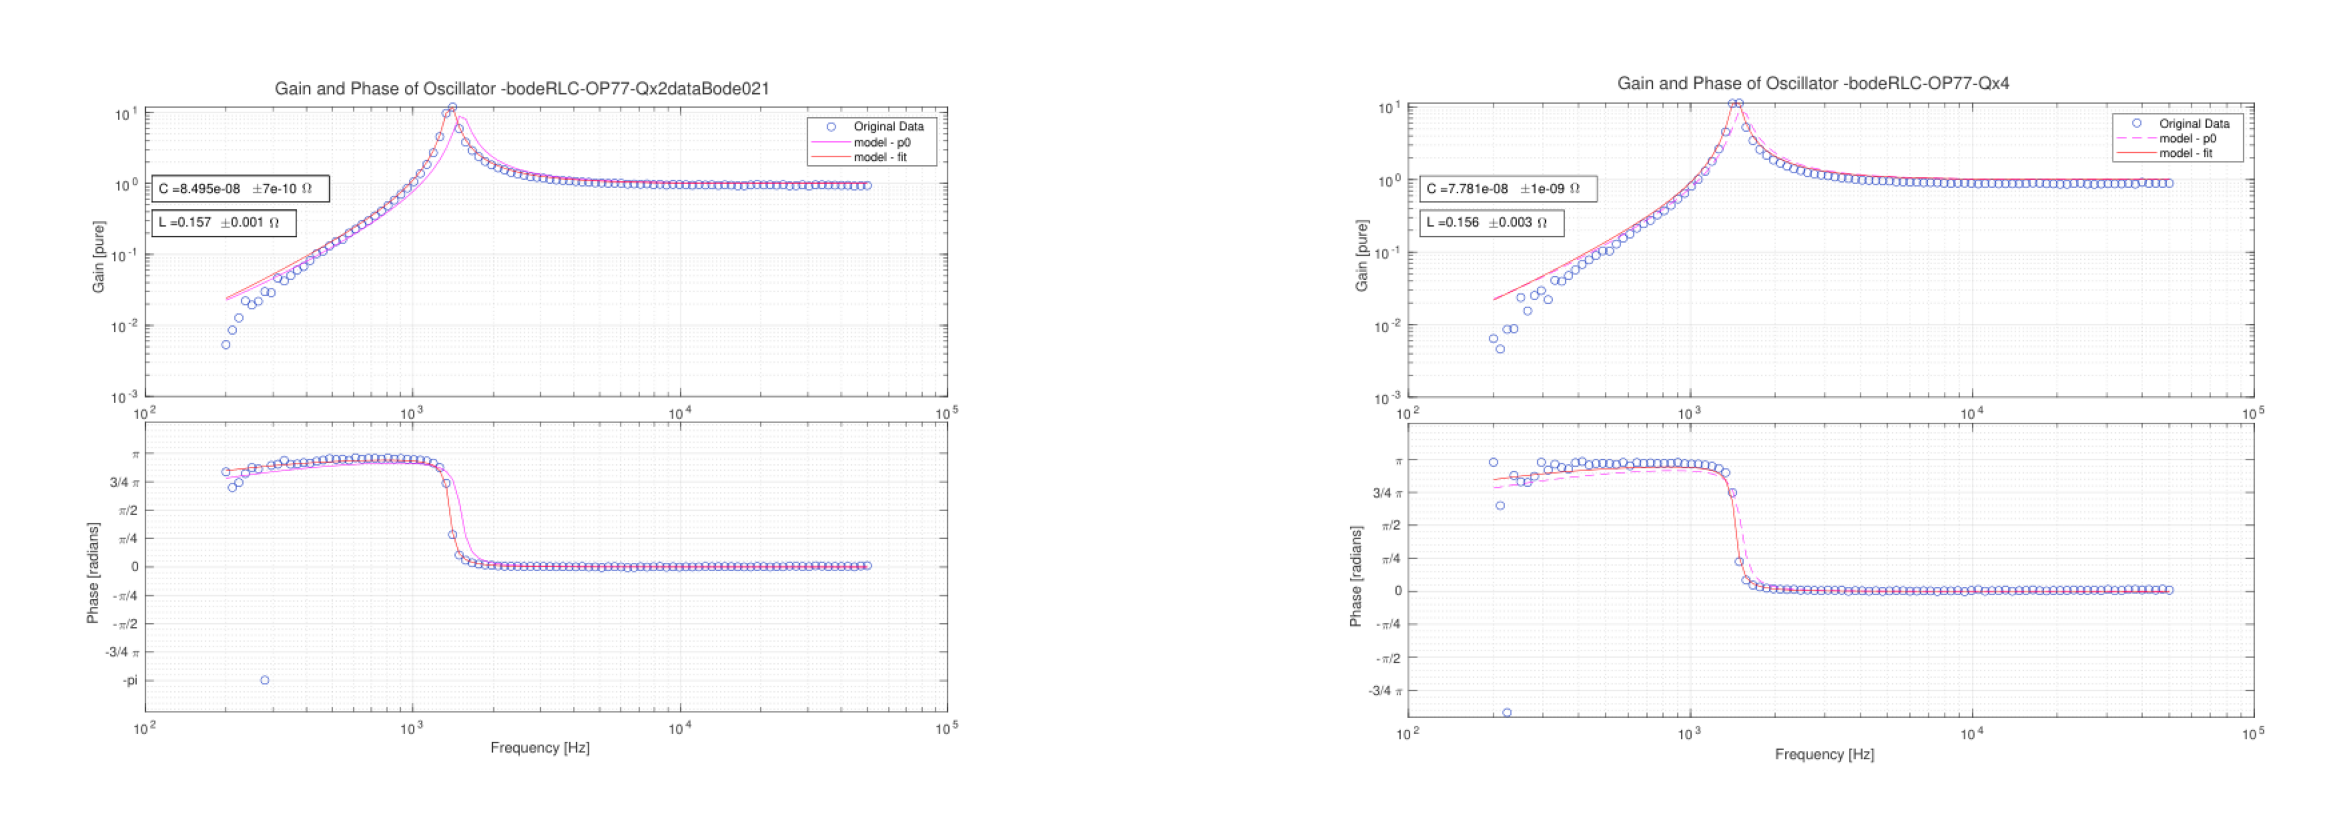

In [20]:
cols = 2
rows = 1
pdfList = ['Media/RLC/bodeRLC-OP77-Qx2dataBode021.pdf', 'Media/RLC/bodeRLC-OP77-Qx4.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)

## Notch
Si può facilmente modificare il circuito appena visto, nominalmente scambiando condensatore e resistore, per ottenere un filtro notch, o eliminabanda.
Questo tipo di filtri sfrutta la risonanza di condensatore e induttore per ridurre l'impedenza della loro serie attorno la frequenza di risonanza in maniera tale da ottenere un guadagno, dato dal partitore tra resistenza e impedenza di serie, tendente a 0 per una piccola finestra di frequenze.
Tuttavia la presenza di un resistore interno al giratore completamente non trascurabile, essendo il suo valore comparabile con quello del resistore esterno, si avrà che il guadagno non scende mai particolarmente negativo e invece avrà semplicemente un minimo, ben fittabile tramite modello che considera la resistenza di serie.

Le osservazioni sono riportate di seguito. 

0


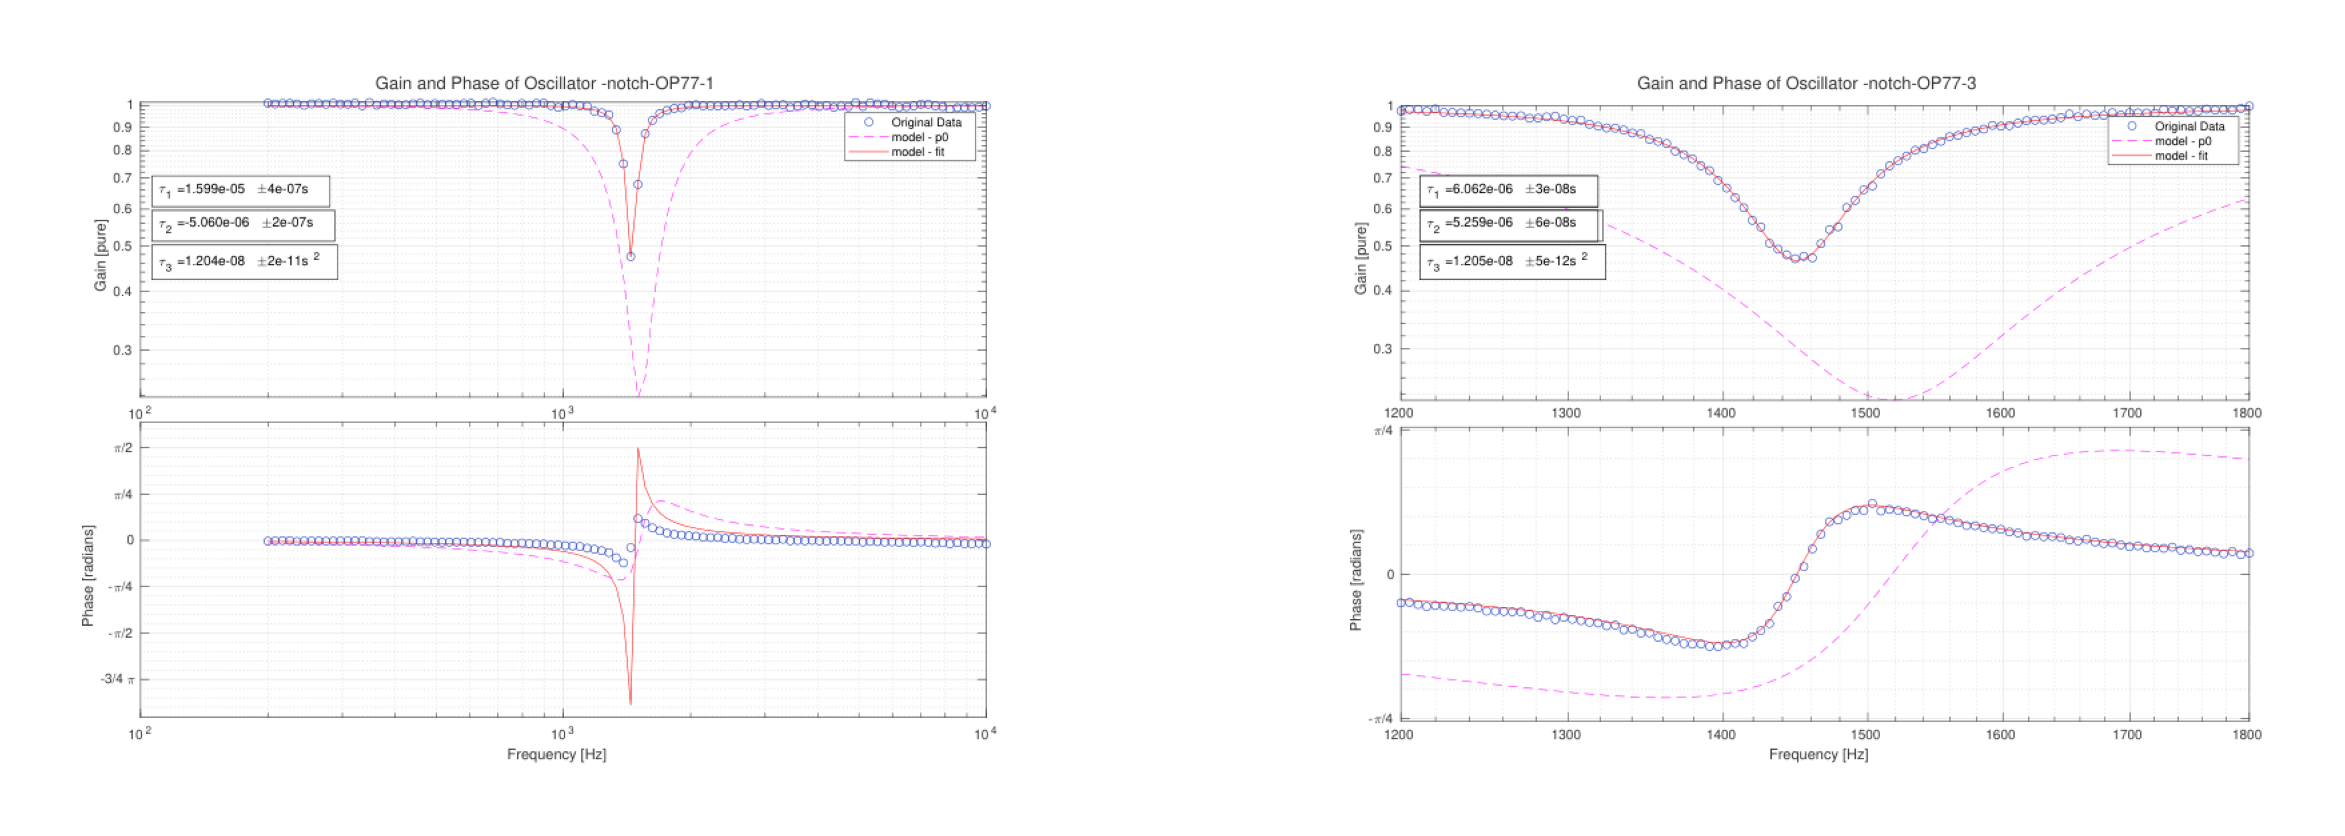

In [21]:
cols = 2
rows = 1
pdfList = ['Media/Notch/notch-OP77-1.pdf', 'Media/Notch/notch-OP77-3.pdf']
display_pdfs_side_by_side(rows, cols, pdfList)